## SVM Kernel practical implementation

In [27]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

In [28]:
x= np.linspace(-5.0, 5.0, 100)
y=np.sqrt(10**2 - x**2)
y=np.hstack([y,-y])
x=np.hstack([x,-x])

In [29]:
x1= np.linspace(-5.0, 5.0, 100)
y1=np.sqrt(5**2 -x1**2)
y1=np.hstack([y1, -y1])
x1=np.hstack([x1, -x1])

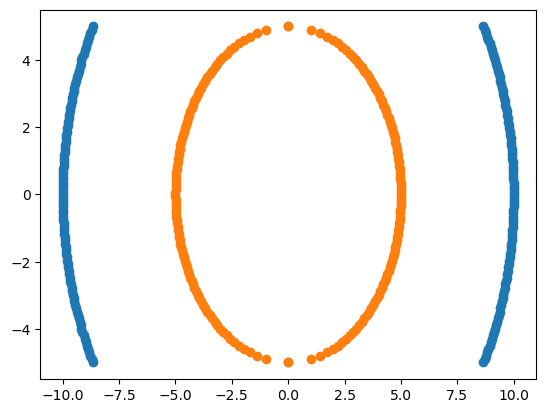

In [30]:
plt.scatter(y,x)
plt.scatter(y1,x1)

In [31]:
import pandas as pd
df1=pd.DataFrame(np.vstack([y,x]).T, columns=['x1', 'x2'])
df1['Y']=0
df2=pd.DataFrame(np.vstack([y1,x1]).T, columns=['x1','x2'])
df2['Y']=1
df=df1.append(df2)
df.head(5)

/tmp/ipykernel_110/2055550855.py:6: FutureWarning:

The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.



,x1,x2,Y
0,8.660254,-5.00000,0
1,8.717792,-4.89899,0
2,8.773790,-4.79798,0
3,8.828277,-4.69697,0
4,8.881281,-4.59596,0


In [32]:
df1.shape

(200, 3)

In [33]:
df2.shape

(200, 3)

In [34]:
df.shape

(400, 3)

In [35]:
df.tail()

,x1,x2,Y
195,-1.969049,-4.59596,1
196,-1.714198,-4.69697,1
197,-1.406908,-4.79798,1
198,-0.999949,-4.89899,1
199,-0.000000,-5.00000,1


## Based on the formula find the componenets for the polynomical 

In [36]:
df['x1_square']=df['x1']**2
df['x2_square']=df['x2']**2
df['x1*x2']=df['x1']*df['x2']

In [37]:
df.head()

,x1,x2,Y,x1_square,x2_square,x1*x2
0,8.660254,-5.00000,0,75.000000,25.000000,-43.301270
1,8.717792,-4.89899,0,75.999898,24.000102,-42.708375
2,8.773790,-4.79798,0,76.979390,23.020610,-42.096467
3,8.828277,-4.69697,0,77.938476,22.061524,-41.466150
4,8.881281,-4.59596,0,78.877155,21.122845,-40.818009


## Independent and Dependent features

In [38]:
x=df[['x1_square','x2_square','x1*x2']]
y=df['Y']

In [39]:
from sklearn.model_selection import train_test_split

In [40]:
x_train, x_test, y_train , y_test =train_test_split(x,y, test_size=0.33, random_state=42)

In [41]:
x_train.shape, x_test.shape, y_train.shape , y_test.shape

((268, 3), (132, 3), (268,), (132,))

In [42]:
x_train.head()

,x1_square,x2_square,x1*x2
58,24.262830,0.737170,4.229163
177,92.283951,7.716049,26.684593
119,90.508622,9.491378,-29.309582
194,79.795429,20.204571,40.152614
29,20.712172,4.287828,-9.423918


In [43]:
!pip install plotly

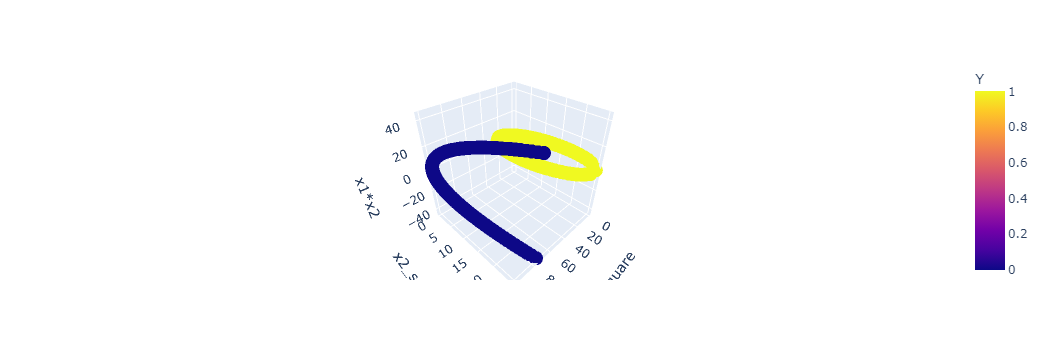

In [47]:
import plotly.express as px
import plotly.express as px
fig=px.scatter_3d(df, x='x1_square',y='x2_square',z='x1*x2', color='Y')
fig.show()

In [48]:
from sklearn.metrics import accuracy_score
from sklearn.svm import SVC

In [49]:
classifier=SVC(kernel='linear')


In [50]:
classifier.fit(x_train, y_train)

SVC(kernel='linear')

In [51]:
y_predict=classifier.predict(x_test)
accuracy_score(y_test, y_predict)

1.0